# 🎶 Predicting Lyrics
<hr>
<br>
<b> Group name: <strike>AA</strike> <i>My Machine Learning Romance</i> </b> <br>
- Fiorella Tenorio <br>
- Katja Wittfoth <br>
- Rebecca Reilly <br>
- Victoria Suarez <br>
- Viviana Márquez <br>

<br>
<img src='USF.png', style="width:200px;" align="left">
Friday, December 7th, 2018. <br>
<b> MSDS 621 </b> - Introduction to Machine Learning 

## Goal 
<center>
    <img src="are you smarter.png">
    <big>Predict genre based on lyrics</big><br><br>
    🥊 Supervised <i>vs.</i> Unspervised  <i>vs.</i> Humans 🥊
</center> 

## Workflow Pipeline
<center>
    <img src="workflow2.png" style="height:500px">
</center> 

In [36]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')

In [3]:
# Read data
df = pd.read_csv('../lyrics.csv')

In [4]:
# Clean data
def clean_lyrics(text):
    text = re.sub('\n', ' ', text)  # removes new lines
    text = re.sub('\d', '', text)  # removes numbers
    text = re.sub('\t', '', text)  # removes tabs
    text = re.sub('[^A-Za-z ]', '', text)  # removes special character
    text = re.sub('\[Verse\s*\d*:]', ' ', text)  # remove verse indicators
    text = re.sub('\s+', ' ', text)
    words = text.split(" ")
    words = [w for w in words if len(w) > 2]  # removes a, an, to, at, be, ...
    return ' '.join(words)


df = df[pd.notnull(df['lyrics'])]
df = df[df['genre'] != 'Not Available']
df = df[df['genre'] != 'Other']
df['lyrics_clean'] = df.lyrics.apply(clean_lyrics)

df_clean = df[(df.genre == 'Country') | (df.genre == 'Metal') |
              (df.genre == 'Hip-Hop') | (df.genre == 'Jazz') | (df.genre == 'Electronic')]

df_clean = df_clean.sample(frac=1)  # shuffle

## 📊 1. Get data and pre-process

- 380,000+ lyrics  from MetroLyrics in <a href="https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics">Kaggle</a>

#### 🛁 Cleaning 
- Remove: `Null` lyrics, "Not available" genre, punctuation, numbers, symbols, spaces, stop words.
- Shuffle data.
- **Genres**: Country, Metal, Hip-Hop, Jazz, Electronic.

In [4]:
df_clean.head()

,index,song,year,artist,genre,lyrics,lyrics_clean
138273,138273,save-me-from-me,2012,bobby-v,Hip-Hop,"Is anybody out there, gonna save me'\nIs anybo...",anybody out there gonna save anybody out there...
268978,268978,that-s-life-i-guess,2006,billie-holiday,Jazz,Sometimes I wonder\nWhat's in store for me\nYo...,Sometimes wonder Whats store for Your love cou...
165826,165826,wer-ich-bin,2007,bushido,Hip-Hop,"Ich bin zurÃ¼ck dieser Dealer vom Block,\nIhr ...",Ich bin zurck dieser Dealer vom Block Ihr knnt...
327046,327046,burned-with-desire-rising-star-mix,2006,armin-van-buuren,Electronic,"For each forgotten kiss,\nFor all the memories...",For each forgotten kiss For all the memories F...
151470,151470,wither,2007,earth-crisis,Metal,Near lifeless skin stretched over a prone skel...,Near lifeless skin stretched over prone skelet...


## 👠 2. Modeling

### ✂️ Splitting data

In [25]:
train, test = train_test_split(df_clean, test_size=0.2)
train_lyrics = train['lyrics_clean']
train_genre = train['genre']
test_lyrics = test['lyrics_clean']
test_genre = test['genre']

### 🥊 Supervised models

- Pipelines: 
   - Vectorizers: CountVectorizer, TfidfVectorizer
   - Estimators: MultinomialNB, LogisticRegression, LinearSVC

- GridSearch

In [6]:
pipe_lr_cv = Pipeline([
    ('cv', CountVectorizer(stop_words='english',
                             lowercase=False,
                             analyzer='word')),
    ('lr', LogisticRegression())
])

pipe_lr_tf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                             lowercase=False,
                             analyzer='word')),
    ('lr', LogisticRegression())
])

pipe_nb_cv = Pipeline([
    ('cv', CountVectorizer(stop_words='english',
                             lowercase=False,
                             analyzer='word')),
    ('nb', MultinomialNB())
])

pipe_nb_tf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                             lowercase=False,
                             analyzer='word')),
    ('nb', MultinomialNB())
])

pipe_svc_cv = Pipeline([
    ('cv', CountVectorizer(stop_words='english',
                             lowercase=False,
                             analyzer='word')),
    ('svc', LinearSVC())
])

pipe_svc_tf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                             lowercase=False,
                             analyzer='word')),
    ('svc', LinearSVC())
])

pipelines = [pipe_lr_cv, pipe_lr_tf, pipe_nb_cv, pipe_nb_tf, pipe_svc_cv, pipe_svc_tf]

In [7]:
# Fit pipe
for pipe in pipelines:
    pipe.fit(train_lyrics, train_genre)

In [8]:
methods = []

for pipe in pipelines:
    name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
    vect = pipe.steps[0][1].__class__.__name__.split('.')[-1]

    predicted = pipe.predict(test_lyrics)
    accuracy = accuracy_score(predicted, test['genre'])
    conf_mat = confusion_matrix(test['genre'], predicted)

    methods.append([name, vect, accuracy, conf_mat])

methods = pd.DataFrame(methods)
methods.columns = ['Model', 'Vectorizer', 'Accuracy', "Confussion_Matrix"]
methods["Strategy"] = methods["Model"] + " -- " + methods["Vectorizer"]
methods.set_index(["Strategy"], inplace=True)

### Pipelines

In [9]:
methods

,Model,Vectorizer,Accuracy,Confussion_Matrix
Strategy,,,,
LogisticRegression -- CountVectorizer,LogisticRegression,CountVectorizer,0.768100,"[[2227, 109, 92, 253, 168], [176, 581, 238, 12..."
LogisticRegression -- TfidfVectorizer,LogisticRegression,TfidfVectorizer,0.759866,"[[2261, 71, 144, 159, 214], [197, 431, 292, 76..."
MultinomialNB -- CountVectorizer,MultinomialNB,CountVectorizer,0.724520,"[[2566, 28, 77, 54, 124], [542, 360, 284, 42, ..."
MultinomialNB -- TfidfVectorizer,MultinomialNB,TfidfVectorizer,0.625008,"[[1109, 14, 1290, 4, 432], [36, 52, 957, 1, 61..."
LinearSVC -- CountVectorizer,LinearSVC,CountVectorizer,0.731615,"[[2089, 156, 132, 313, 159], [164, 691, 218, 1..."
LinearSVC -- TfidfVectorizer,LinearSVC,TfidfVectorizer,0.781782,"[[2281, 105, 108, 213, 142], [165, 662, 237, 1..."


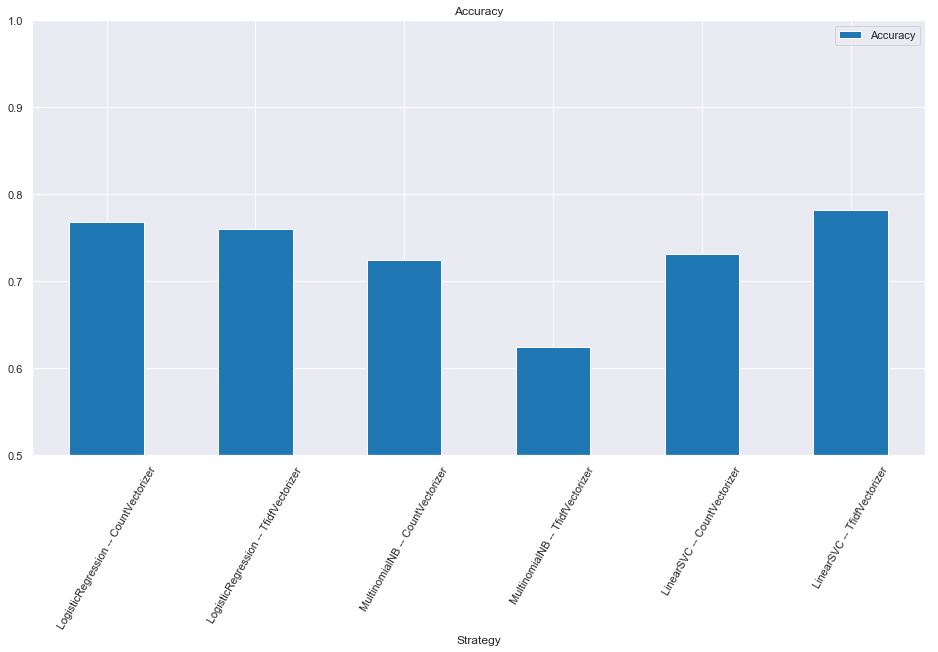

In [10]:
#%matplotlib inline
methods.plot(figsize=(16, 8),kind='bar',title='Accuracy', rot=60, ylim=(0.5,1),colormap='tab10')

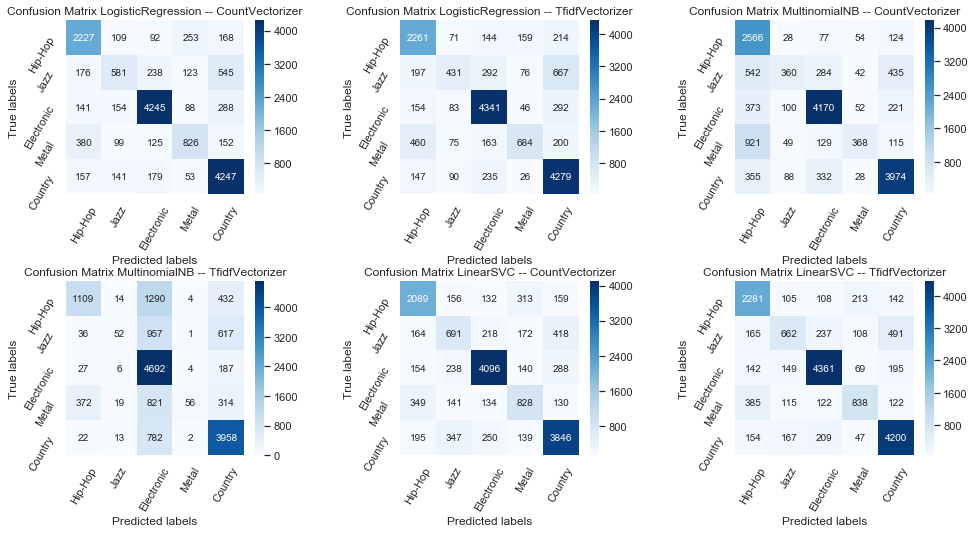

In [11]:
#%matplotlib inline
methods = methods.reset_index()
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    sns.heatmap(methods["Confussion_Matrix"].values[i-1], annot=True, fmt = 'd', ax = ax, cmap="Blues");
    ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {methods["Strategy"].values[i-1]}');
    ax.xaxis.set_ticklabels(df_clean.genre.unique(), rotation=60 ); 
    ax.yaxis.set_ticklabels(df_clean.genre.unique(), rotation=60 );

We know LinearSVC with TfidfVectorizer is the best.
Go back and do manual grid search.

### Grid Search

In [12]:
grid = {'svc__loss': ['hinge', 'squared_hinge']}

gs = GridSearchCV(pipe_svc_tf,
                  param_grid=grid,
                  scoring='accuracy')

In [13]:
gs.fit(train_lyrics, train_genre)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__loss': ['hinge', 'squared_hinge']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [14]:
gs.cv_results_

{'mean_fit_time': array([20.27389606, 10.05352402]),
 'std_fit_time': array([1.2627436 , 0.95058361]),
 'mean_score_time': array([3.25944042, 3.1356039 ]),
 'std_score_time': array([0.18695786, 0.02035713]),
 'param_svc__loss': masked_array(data=['hinge', 'squared_hinge'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__loss': 'hinge'}, {'svc__loss': 'squared_hinge'}],
 'split0_test_score': array([0.76764846, 0.77244656]),
 'split1_test_score': array([0.76858758, 0.77234073]),
 'split2_test_score': array([0.76690265, 0.77108376]),
 'mean_test_score': array([0.76771292, 0.77195705]),
 'std_test_score': array([0.00068937, 0.00061898]),
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_train_score': array([0.88564234, 0.9411583 ]),
 'split1_train_score': array([0.88935079, 0.94272751]),
 'split2_train_score': array([0.88614931, 0.94109124]),
 'mean_train_score': array([0.88704748, 0.94165902]),
 'std_train_score': array([0.0

In [15]:
gs.best_estimator_.steps[0][1]  # best model

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [16]:
pred = gs.predict(test_lyrics)

In [33]:
accuracy = accuracy_score(pred, test_genre)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7818


# Random Forest with Feature Union

In [30]:
df_sample = df.sample(n=100000) # sample because it takes too long to run

df_sample = df_sample[pd.notnull(df_sample['lyrics'])]
df_sample = df_sample[df_sample['genre'] != 'Not Available']
df_sample = df_sample[df_sample['genre'] != 'Other']
df_sample['lyrics_clean'] = df_sample.lyrics.apply(clean_lyrics)

df_clean = df_sample[(df_sample.genre == 'Country') | (df_sample.genre == 'Metal') |
              (df_sample.genre == 'Hip-Hop') | (df_sample.genre == 'Jazz') | (df_sample.genre == 'Electronic')]

In [31]:
X, y = df_clean['lyrics'], df_clean['genre']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
class Polarity(BaseEstimator, TransformerMixin):
    """Takes in the lyrics column and outputs polarity score"""

    def __init__(self):
        pass

    def sent_score(self, song):
        """Helper code to compute sentiment"""
        sid = SentimentIntensityAnalyzer()
        if type(song) is str:
            return sid.polarity_scores(", ".join(song.split("\n")))['compound']
        else:
            return 0

    def transform(self, X, y=None):
        """Transform function of this feature extractor"""
        return np.array(X.apply(self.sent_score)).reshape(-1, 1)

    def fit(self, X, y=None):
        """Returns `self` unless there is other functions in train and test"""
        return self

In [38]:
class AverageWordLength(BaseEstimator, TransformerMixin):
    """Takes in the lyrics column and outputs average word length"""

    def __init__(self):
        pass

    def average_word_length(self, song):
        """Helper code to compute average word length"""
        return np.mean([len(w) for w in clean_lyrics(song).split(" ")])

    def transform(self, X, y=None):
        """Transform function of this feature extractor"""
        return np.array(X.apply(self.average_word_length)).reshape(-1, 1)

    def fit(self, X, y=None):
        """Returns `self` unless there is other functions in train and test"""
        return self

In [39]:
# features:
countVectorizer = ('vect', CountVectorizer(
    stop_words='english', lowercase=True, analyzer='word'))
tfidf = ('tfidf', TfidfVectorizer())
polarity = ('polarity', Polarity())
avg_len = ('avg_len', AverageWordLength())

# pipe this features into the pipeline and FeatureUnion
pipeline = Pipeline([
    ('feats', FeatureUnion([avg_len, polarity, countVectorizer])),
    ('clf', RandomForestClassifier(n_estimators=200, n_jobs=-1))
])

In [40]:
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

0.7467434110875493

In [43]:
accuracy_score(pred, y_test)
print(f"Accuracy: {accuracy_score(pred, y_test):.4f}")

Accuracy: 0.7467


# 🏆 Winner supervised model: 

`LinearSVC() with TfidfVectorizer()`

### 🥊 Unsupervised models

- Pipelines: 
   - Vectorizers: CountVectorizer, TfidfVectorizer
   - Estimators: MultinomialNB, LogisticRegression, LinearSVC

- GridSearch

In [28]:
# we create the vectorizer
tfidf = TfidfVectorizer(stop_words='english',
                       tokenizer= lambda x: x.split())

# we fit the train data
tf_features = tfidf.fit_transform(train.lyrics_clean)

# and we transform the test data
test_features = tfidf.transform(test.lyrics_clean)

In [42]:
# now, we fit the model
true_k = 11
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_features)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

# Because this is an unsupervied algorithm, it is searching for the underlying structure of the data. The most important feature appears to be language.

<center>
    <img src="KMeans_Result.png">
</center> 

# Recap ✍️